In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
loans = pd.read_csv('./loan_borowwer_data.csv')

In [4]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loans.tail(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [6]:
loans.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [7]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
loans.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
loans.shape

(9578, 14)

In [10]:
loans.size

134092

In [3]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


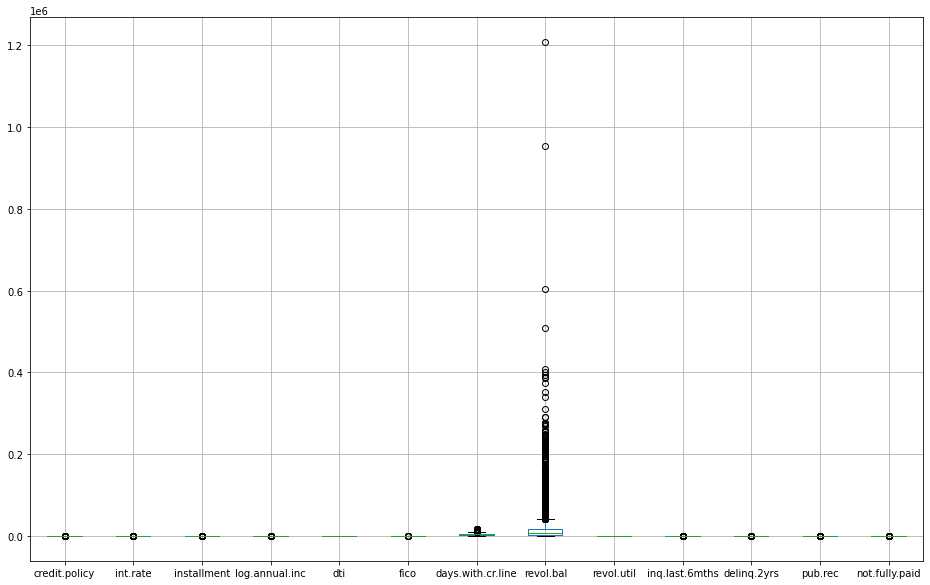

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
loans.boxplot();

In [12]:
loans["not.fully.paid"].unique()

array([0, 1], dtype=int64)

In [13]:
loans["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [14]:
loans["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
loans["purpose"] = lb.fit_transform(loans["purpose"])

In [16]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
loans['purpose'].value_counts()

2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: purpose, dtype: int64

<AxesSubplot:>

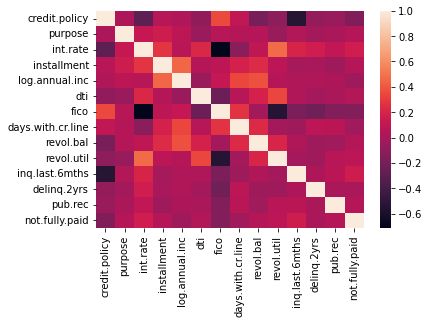

In [21]:
import seaborn as sns
sns.heatmap(loans.corr())

In [29]:
loans['revol.bal']=np.sqrt(loans['revol.util'])

In [30]:
loans.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,6.334997,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,2.582197,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,4.753946,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,6.804410,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,8.420214,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,10.908712,119.000000,33.000000,13.000000,5.000000,1.000000


In [31]:
X = loans.drop("not.fully.paid", axis=1)
y = loans["not.fully.paid"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=4,stratify=y)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250)

In [53]:
pred = rf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
accuracy_score(y_test,pred)

0.8382045929018789

In [55]:
confusion_matrix(y_test,pred) # 1 not fully paid , 0 fully paid

array([[1602,    7],
       [ 303,    4]], dtype=int64)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.36      0.01      0.03       307

    accuracy                           0.84      1916
   macro avg       0.60      0.50      0.47      1916
weighted avg       0.76      0.84      0.77      1916



In [57]:
y_train.value_counts()

0    6436
1    1226
Name: not.fully.paid, dtype: int64

In [62]:
X_train.shape

(7662, 13)

Apply over sampling SMOTE

In [67]:
from imblearn.over_sampling import SMOTE

In [69]:
sm = SMOTE(random_state=100)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [71]:
X_train_sm.shape

(12872, 13)

In [73]:
y_train_sm.shape

(12872,)

In [74]:
y_train.value_counts()

0    6436
1    1226
Name: not.fully.paid, dtype: int64

In [76]:
y_train_sm.value_counts()

1    6436
0    6436
Name: not.fully.paid, dtype: int64

In [77]:
RF=RandomForestClassifier(n_estimators=250)

In [78]:
RF.fit(X_train_sm,y_train_sm)

RandomForestClassifier(n_estimators=250)

In [80]:
pred_rf=RF.predict(X_test)

In [81]:
accuracy_score(y_test,pred_rf)

0.7807933194154488

In [82]:
confusion_matrix(y_test,pred_rf)

array([[1419,  190],
       [ 230,   77]], dtype=int64)

In [84]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1609
           1       0.29      0.25      0.27       307

    accuracy                           0.78      1916
   macro avg       0.57      0.57      0.57      1916
weighted avg       0.77      0.78      0.77      1916



ROC curve

In [87]:
y_prob = RF.predict_proba(X_test)

In [88]:
from sklearn.metrics import roc_curve, auc

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

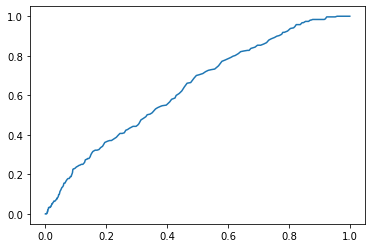

In [90]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)

In [91]:
auc(fpr,tpr)

0.6369930541356336

In [92]:
opt = np.sqrt(tpr*(1-fpr))

In [93]:
ind = np.argmax(opt)

In [94]:
thresholds[ind]

0.296

In [95]:
sample = pd.DataFrame({"actual":y_test, "pred":y_prob[:,1]})

In [97]:
sample["new_pred"] = np.where(sample["pred"]>0.296, 1, 0)

In [98]:
confusion_matrix(sample["actual"], sample["new_pred"])

array([[875, 734],
       [110, 197]], dtype=int64)

In [100]:
confusion_matrix(y_test,pred_rf)

array([[1419,  190],
       [ 230,   77]], dtype=int64)

In [102]:
accuracy_score(y_test,sample["new_pred"])

0.5594989561586639

In [109]:
print(classification_report(sample["actual"], sample["new_pred"]))

              precision    recall  f1-score   support

           0       0.89      0.54      0.67      1609
           1       0.21      0.64      0.32       307

    accuracy                           0.56      1916
   macro avg       0.55      0.59      0.50      1916
weighted avg       0.78      0.56      0.62      1916

